In [1]:
from pandas import read_hdf
from nenequitia.datasets import DataFrameDataset
from nenequitia.models import AttentionalModule

model = AttentionalModule.load_from_checkpoint("explogs/AttentionalModule/1/checkpoints/sample-epoch=10.ckpt")
encoder = model.encoder
df = read_hdf("preds.hdf")
df["transcription"] = df.text
ds = DataFrameDataset(
    df,
    encoder=encoder,
    is_gt=False
)

In [4]:
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader

t = Trainer()
preds = []
for batch in t.predict(
    model, 
    dataloaders=DataLoader(
        ds,
        batch_size=256,
        collate_fn=model.encoder.pad_pred
    )
):
    preds.extend(batch)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/thibault/dev/Medieval-Model/env/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1766: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
/home/thibault/dev/Medieval-Model/env/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:219: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

In [5]:
df["Prediction"] = preds

In [8]:
df.to_hdf("preds-completed.hdf", key="df")

In [9]:
df.head()

,lang,century,page,manuscript,text,transcription,Prediction
0,lat,10,f14,btv1b10032123t,apparente. Iuno .i. aer splendore eꝰ. illustrat᷑.,apparente. Iuno .i. aer splendore eꝰ. illustrat᷑.,Good
1,lat,10,f14,btv1b10032123t,ẜlaciditatem quandam et serenttatẽ ab eo,ẜlaciditatem quandam et serenttatẽ ab eo,Good
2,lat,10,f14,btv1b10032123t,sus cipit. Quuntiq idem phoeb fecerat subuola,sus cipit. Quuntiq idem phoeb fecerat subuola,Good
3,lat,10,f14,btv1b10032123t,re: filias ad conspectum parentũ subuolare,re: filias ad conspectum parentũ subuolare,Good
4,lat,10,f14,btv1b10032123t,.. conscendere adconspectũ parentũ. iouis,.. conscendere adconspectũ parentũ. iouis,Good


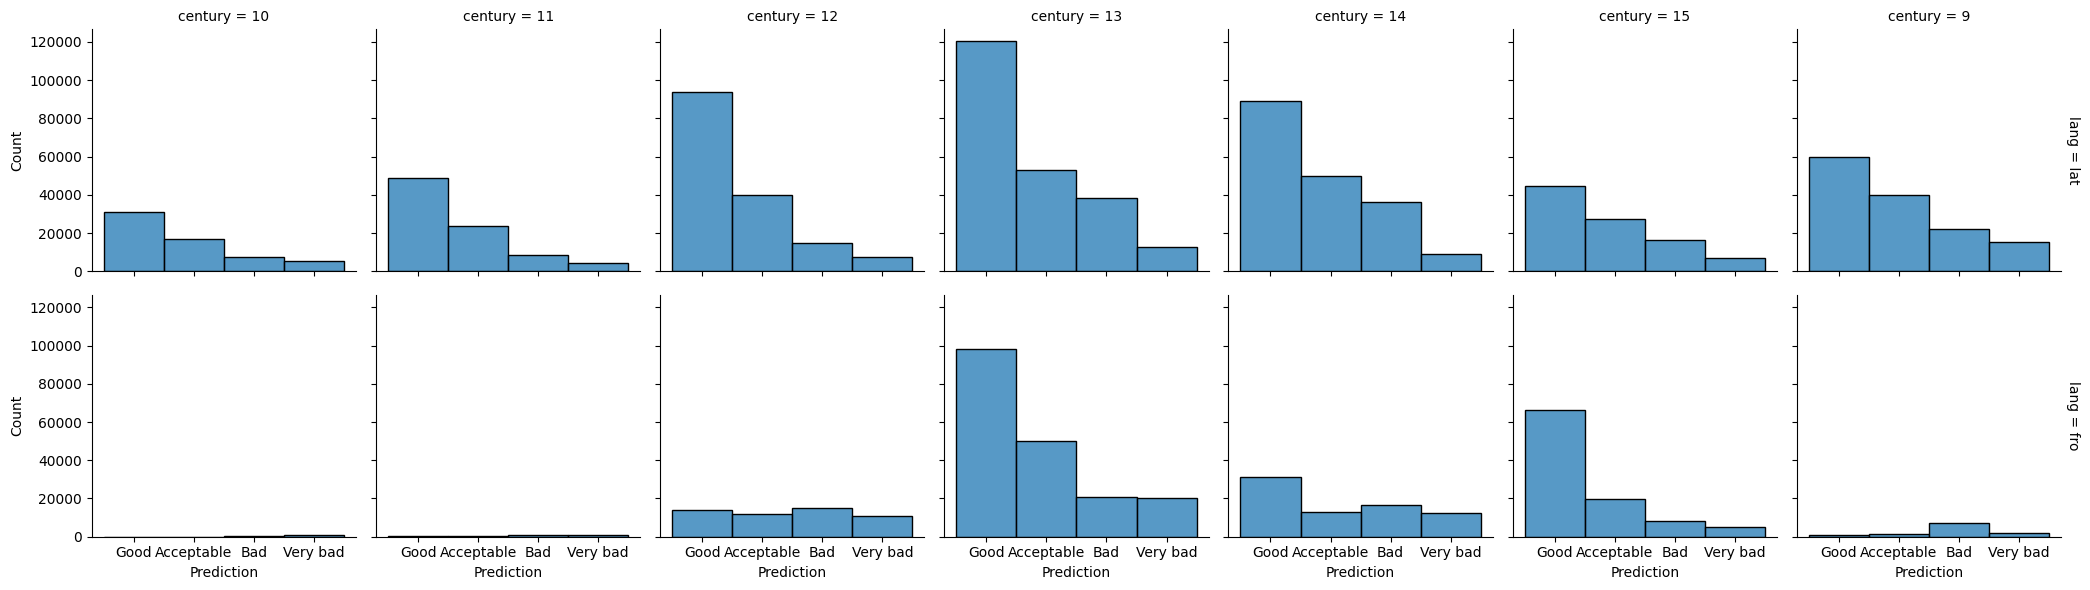

In [10]:
import seaborn as sns

sns.displot(
    df, x="Prediction", col="century", row="lang",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)